group by

In [1]:
import pandas as pd
import numpy as np

In [2]:
salaries = pd.DataFrame({
    'name':['BOSS', 'Lilei', 'Lilei', 'Han', 'BOSS', 'BOSS', 'Han', 'BOSS'],
    'Year':[2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary':[999999,20000,25000,3000,9999999,999999,3500,999999],
    'Bonus':[100000,20000,20000,5000,200000,300000,3000,400000]
})

In [3]:
salaries.columns

Index(['Bonus', 'Salary', 'Year', 'name'], dtype='object')

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Bonus     8 non-null int64
Salary    8 non-null int64
Year      8 non-null int64
name      8 non-null object
dtypes: int64(3), object(1)
memory usage: 336.0+ bytes


In [5]:
salaries.describe

<bound method NDFrame.describe of     Bonus   Salary  Year   name
0  100000   999999  2016   BOSS
1   20000    20000  2016  Lilei
2   20000    25000  2016  Lilei
3    5000     3000  2016    Han
4  200000  9999999  2017   BOSS
5  300000   999999  2017   BOSS
6    3000     3500  2017    Han
7  400000   999999  2017   BOSS>

In [6]:
group_by_name = salaries.groupby('name')

In [7]:
group_by_name

In [8]:
type(group_by_name)

pandas.core.groupby.DataFrameGroupBy

In [9]:
group_by_name.sum()

,Bonus,Salary,Year
name,,,
BOSS,1000000,12999996,8067
Han,8000,6500,4033
Lilei,40000,45000,4032


In [10]:
group_by_name['Salary','Bonus'].sum()

,Salary,Bonus
name,,
BOSS,12999996,1000000
Han,6500,8000
Lilei,45000,40000


In [12]:
group_by_name['Salary','Bonus'].agg(sum)

,Salary,Bonus
name,,
BOSS,12999996,1000000
Han,6500,8000
Lilei,45000,40000


In [13]:
group_by_name.groups

{'BOSS': Int64Index([0, 4, 5, 7], dtype='int64'),
 'Han': Int64Index([3, 6], dtype='int64'),
 'Lilei': Int64Index([1, 2], dtype='int64')}

In [15]:
group_by_name_year = salaries.groupby(['name','Year'])

In [16]:
group_by_name_year.sum()

Bonus    Salary
name  Year                  
BOSS  2016  100000    999999
      2017  900000  11999997
Han   2016    5000      3000
      2017    3000      3500
Lilei 2016   40000     45000

In [17]:
group_by_name_year.size()

name   Year
BOSS   2016    1
       2017    3
Han    2016    1
       2017    1
Lilei  2016    2
dtype: int64

In [21]:
for name,group in group_by_name:
    print(name)
    print(group)

BOSS
    Bonus   Salary  Year  name
0  100000   999999  2016  BOSS
4  200000  9999999  2017  BOSS
5  300000   999999  2017  BOSS
7  400000   999999  2017  BOSS
Han
   Bonus  Salary  Year name
3   5000    3000  2016  Han
6   3000    3500  2017  Han
Lilei
   Bonus  Salary  Year   name
1  20000   20000  2016  Lilei
2  20000   25000  2016  Lilei


In [22]:
group_by_name.get_group('Lilei')

,Bonus,Salary,Year
1,20000,20000,2016
2,20000,25000,2016


In [23]:
group_by_name[['Bonus','Salary']].agg(['sum','mean','std'])

Bonus                           Salary                       
           sum    mean            std       sum     mean           std
name                                                                  
BOSS   1000000  250000  129099.444874  12999996  3249999  4.500000e+06
Han       8000    4000    1414.213562      6500     3250  3.535534e+02
Lilei    40000   20000       0.000000     45000    22500  3.535534e+03

In [24]:
nvda = pd.read_csv('NVDA.csv',index_col = 0,parse_dates=['Date'])

In [26]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [27]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 1999-01-22 to 2017-07-20
Data columns (total 6 columns):
Open         4654 non-null float64
High         4654 non-null float64
Low          4654 non-null float64
Close        4654 non-null float64
Adj Close    4654 non-null float64
Volume       4654 non-null int64
dtypes: float64(5), int64(1)
memory usage: 254.5 KB


In [29]:
nvda.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03
mean,18.872888,19.222090,18.513574,18.879564,18.091126,1.632563e+07
std,22.025278,22.346668,21.662627,22.048935,22.093697,1.204002e+07
min,1.395833,1.421875,1.333333,1.364583,1.267107,4.920000e+05
25%,8.510000,8.755000,8.245261,8.505000,7.897462,8.721475e+06
50%,13.810000,14.090000,13.500000,13.814167,12.832797,1.373830e+07
75%,19.770000,20.129999,19.505000,19.789167,18.774976,2.041408e+07
max,166.330002,168.500000,164.610001,167.500000,167.500000,2.307714e+08


In [30]:
nvda['year'] = nvda.index.year

In [31]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,1999
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1999
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1999
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1999
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1999


In [32]:
nvda.drop(['year'],axis=1,inplace=True)

In [33]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [37]:
key = lambda x:x.year
nvda.groupby(key).agg(['mean','std']).head()

Open                 High                  Low            \
           mean       std       mean       std       mean       std   
1999   1.950782  0.588882   2.007317  0.614302   1.883559  0.571658   
2000   8.781084  2.999908   9.222697  3.114186   8.360522  2.904761   
2001  13.091254  3.839777  13.600750  3.829838  12.680548  3.830944   
2002   9.690344  6.561287   9.955093  6.664226   9.344391  6.375212   
2003   5.902434  1.461862   6.042659  1.491260   5.764960  1.423422   

          Close            Adj Close                  Volume                
           mean       std       mean       std          mean           std  
1999   1.947230  0.601041   1.808134  0.558107  6.433220e+06  8.142949e+06  
2000   8.778826  3.013104   8.151729  2.797869  1.104182e+07  7.985374e+06  
2001  13.181552  3.833637  12.239956  3.559789  2.782387e+07  1.384318e+07  
2002   9.614749  6.519053   8.927940  6.053379  3.168655e+07  1.558742e+07  
2003   5.900344  1.459852   5.478865  1.355570  2.430220e+07  1.899657e+07

In [46]:
my_transform = lambda x : (x - x.mean())/x.std()
key = lambda x : x.year
transform = nvda.groupby(key).transform(my_transform)

In [47]:
transform.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [48]:
transform2 = nvda.groupby(key).apply(my_transform)

In [51]:
transform2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [52]:
%matplotlib inline

In [55]:
my_compare = pd.DataFrame({'orign Adj Clos':nvda['Adj Close'],
                          'Transform Adj Clos':transform['Adj Close']
                          })

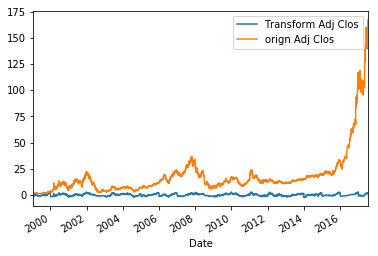

In [56]:
my_compare.plot()

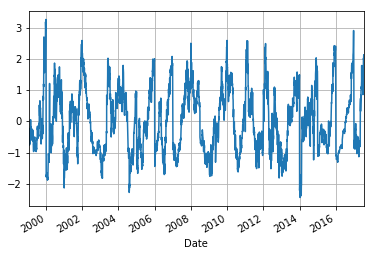

In [57]:
transform['Adj Close'].plot(grid = True)

In [59]:
price_range = lambda x:x.max() - x.min()
nvda.groupby(key).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [60]:
def year_trans(x):
    return x-1

salaries['trans_year'] = salaries['Year'].apply(year_trans)

In [61]:
salaries

,Bonus,Salary,Year,name,trans_year
0,100000,999999,2016,BOSS,2015
1,20000,20000,2016,Lilei,2015
2,20000,25000,2016,Lilei,2015
3,5000,3000,2016,Han,2015
4,200000,9999999,2017,BOSS,2016
5,300000,999999,2017,BOSS,2016
6,3000,3500,2017,Han,2016
7,400000,999999,2017,BOSS,2016


In [63]:
#def trans(x):
#    return x.Year + x.Salary - x.Bonus

#salaries.apply(trans)

salaries


,Bonus,Salary,Year,name,trans_year
0,100000,999999,2016,BOSS,2015
1,20000,20000,2016,Lilei,2015
2,20000,25000,2016,Lilei,2015
3,5000,3000,2016,Han,2015
4,200000,9999999,2017,BOSS,2016
5,300000,999999,2017,BOSS,2016
6,3000,3500,2017,Han,2016
7,400000,999999,2017,BOSS,2016


In [64]:
salaries['Salary_shift'] = salaries['Salary'].shift()

In [65]:
salaries

,Bonus,Salary,Year,name,trans_year,Salary_shift
0,100000,999999,2016,BOSS,2015,NaN
1,20000,20000,2016,Lilei,2015,999999.0
2,20000,25000,2016,Lilei,2015,20000.0
3,5000,3000,2016,Han,2015,25000.0
4,200000,9999999,2017,BOSS,2016,3000.0
5,300000,999999,2017,BOSS,2016,9999999.0
6,3000,3500,2017,Han,2016,999999.0
7,400000,999999,2017,BOSS,2016,3500.0


In [66]:
salaries['diff'] = salaries['Salary'] - salaries['Salary_shift']

In [67]:
salaries

,Bonus,Salary,Year,name,trans_year,Salary_shift,diff
0,100000,999999,2016,BOSS,2015,NaN,NaN
1,20000,20000,2016,Lilei,2015,999999.0,-979999.0
2,20000,25000,2016,Lilei,2015,20000.0,5000.0
3,5000,3000,2016,Han,2015,25000.0,-22000.0
4,200000,9999999,2017,BOSS,2016,3000.0,9996999.0
5,300000,999999,2017,BOSS,2016,9999999.0,-9000000.0
6,3000,3500,2017,Han,2016,999999.0,-996499.0
7,400000,999999,2017,BOSS,2016,3500.0,996499.0


In [68]:
salaries['Salary'].shift(-1)

0      20000.0
1      25000.0
2       3000.0
3    9999999.0
4     999999.0
5       3500.0
6     999999.0
7          NaN
Name: Salary, dtype: float64

concat

In [77]:
df1 = pd.DataFrame({
    'apts':[55000,60000,800000],
    'cars':[20000,300000,400000]
})

In [71]:
df2 = pd.DataFrame({
    'apts':[55000,60000,500000],
    'cars':[20000,300000,410000]
})

In [72]:
df3 = pd.DataFrame({
    'apts':[55000,60000,340000],
    'cars':[20000,300000,4112000]
})

In [78]:
df1

,apts,cars
0,55000,20000
1,60000,300000
2,800000,400000


In [74]:
df2

,apts,cars
0,55000,20000
1,60000,300000
2,500000,410000


In [75]:
df3

,apts,cars
0,55000,20000
1,60000,300000
2,340000,4112000


In [80]:
pd.concat([df1,df2,df3])

,apts,cars
0,55000,20000
1,60000,300000
2,800000,400000
0,55000,20000
1,60000,300000
2,500000,410000
0,55000,20000
1,60000,300000
2,340000,4112000


In [81]:
pd.concat([df1,df2,df3],axis = 1)

,apts,cars,apts,cars,apts,cars
0,55000,20000,55000,20000,55000,20000
1,60000,300000,60000,300000,60000,300000
2,800000,400000,500000,410000,340000,4112000


Merge

bike project

In [83]:
import pandas as pd
import numpy as np

In [91]:
bikes = pd.read_csv('bikes.csv',encoding='latin',sep=';',parse_dates=['Date'],index_col = 'Date')

In [92]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [93]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-05-11
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


dropna 删除缺省值

In [94]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [95]:
bikes.dropna(how = 'all').head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [96]:
bikes.dropna(how = 'all',axis = 1).head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-02-01,83,1,68,153,53,6,43
2012-03-01,135,2,104,248,89,3,58
2012-04-01,144,1,116,318,111,8,61
2012-05-01,197,2,124,330,97,13,95


In [98]:
bikes.shape

(310, 9)

In [99]:
bikes.apply(lambda x:sum(x.isnull()))

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

In [101]:
bikes['Berri 1'].value_counts().head()

3341    3
1986    2
303     2
3698    2
3964    2
Name: Berri 1, dtype: int64

In [102]:
row = bikes.iloc[0].copy()

In [103]:
row

Berri 1                                35.0
Brébeuf (données non disponibles)       NaN
Côte-Sainte-Catherine                   0.0
Maisonneuve 1                          38.0
Maisonneuve 2                          51.0
du Parc                                26.0
Pierre-Dupuy                           10.0
Rachel1                                16.0
St-Urbain (données non disponibles)     NaN
Name: 2012-01-01 00:00:00, dtype: float64

In [104]:
row.fillna(row.mean())

Berri 1                                35.000000
Brébeuf (données non disponibles)      25.142857
Côte-Sainte-Catherine                   0.000000
Maisonneuve 1                          38.000000
Maisonneuve 2                          51.000000
du Parc                                26.000000
Pierre-Dupuy                           10.000000
Rachel1                                16.000000
St-Urbain (données non disponibles)    25.142857
Name: 2012-01-01 00:00:00, dtype: float64

In [105]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [106]:
berri_bikes = bikes[['Berri 1']].copy()

In [113]:
berri_bikes.index.weekofyear

Int64Index([52,  5,  9, 13, 18, 22, 26, 31, 35, 40,
            ...
            43, 43, 44, 44, 44,  2,  6, 10, 15, 19],
           dtype='int64', name='Date', length=310)

In [114]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

In [115]:
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-02-01,83,2
2012-03-01,135,3
2012-04-01,144,6
2012-05-01,197,1


In [117]:
weekday_count = berri_bikes.groupby('weekday').agg(sum)

In [118]:
weekday_count

,Berri 1
weekday,
0,132446
1,119895
2,146785
3,147630
4,150183
5,118232
6,110194


In [119]:
weekday_count.reset_index()
weekday_count.columns = ['weekday count']

In [120]:
weekday_count

,weekday count
weekday,
0,132446
1,119895
2,146785
3,147630
4,150183
5,118232
6,110194


In [121]:
weekday_count.index = ['Sunday','Monday','Tuesday','Wensday','Tursday','Friday','Saturday']

In [125]:
weekday_count.head()

,weekday count
Sunday,132446
Monday,119895
Tuesday,146785
Wensday,147630
Tursday,150183


In [123]:
bikes_sum = bikes.sum(axis =1 ).to_frame()

In [126]:
bikes_sum.head()

,0
Date,
2012-01-01,176.0
2012-02-01,407.0
2012-03-01,639.0
2012-04-01,759.0
2012-05-01,858.0


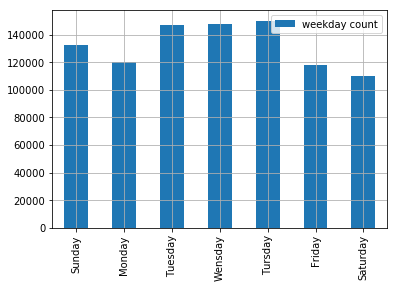

In [127]:
weekday_count.plot(grid = True,kind = 'bar')

stock project

In [128]:
goog = pd.read_csv('GOOG.csv',index_col = 0,)

In [130]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


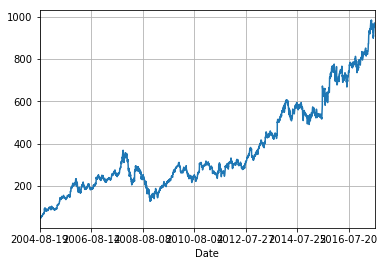

In [131]:
goog['Adj Close'].plot(grid = True)

shfit可以平移数据

In [132]:
goog['log-return'] = np.log(goog['Adj Close']/goog['Adj Close'].shift(1))

In [133]:
goog['log-return'].head()

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: log-return, dtype: float64

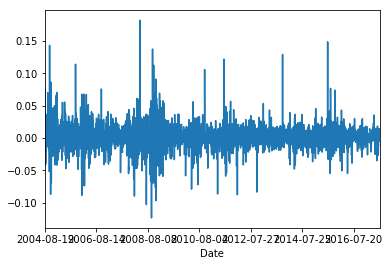

In [134]:
goog['log-return'].plot()

In [135]:
msft = pd.read_csv('MSFT.csv',index_col = 0)

In [137]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.065242,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.067572,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.068737,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.066990,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.065825,47894400


In [138]:
stocks = pd.DataFrame({
    'GOOGLE':goog['Adj Close'].ffill(),
    'MSFT':msft['Adj Close'].ffill()
})

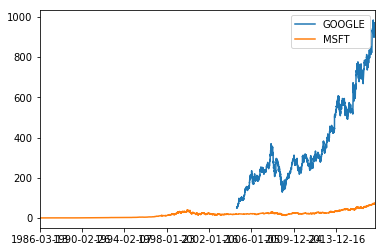

In [139]:
stocks.plot()

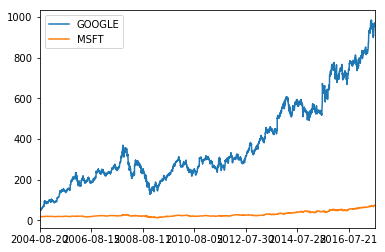

In [147]:
stocks[stocks.index > stocks['GOOGLE'].first_valid_index()].plot()

In [148]:
df = pd.read_csv('credit-data.csv',index_col = 0)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112415 entries, 1 to 0
Data columns (total 10 columns):
revolving_utilization_of_unsecured_lines       112415 non-null float64
age                                            112415 non-null int64
number_of_time30-59_days_past_due_not_worse    112415 non-null int64
debt_ratio                                     112415 non-null float64
monthly_income                                 112415 non-null float64
number_of_open_credit_lines_and_loans          112415 non-null int64
number_of_times90_days_late                    112415 non-null int64
number_real_estate_loans_or_lines              112415 non-null int64
number_of_time60-89_days_past_due_not_worse    112415 non-null int64
number_of_dependents                           112415 non-null float64
dtypes: float64(4), int64(6)
memory usage: 9.4 MB


In [152]:
df.describe()

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,112415.000000,112415.000000,112415.000000,112415.000000,1.124150e+05,112415.000000,112415.000000,112415.000000,112415.000000,112415.000000
mean,6.296153,52.282818,0.427781,347.844712,6.359829e+03,8.451924,0.272232,1.016217,0.246417,0.737482
std,263.358839,14.772929,4.266292,1691.274257,1.310894e+04,5.146886,4.243559,1.122465,4.229691,1.106977
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030086,41.000000,0.000000,0.174826,3.235000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.155065,52.000000,0.000000,0.366463,5.200000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.560295,63.000000,0.000000,0.869476,8.000000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,307001.000000,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


In [155]:
df['income_bins'] = pd.cut(df.monthly_income,bins=15,labels = False)

In [156]:
df.income_bins.value_counts()

0     112392
1         11
3          5
2          4
14         1
7          1
4          1
Name: income_bins, dtype: int64